# Static Visualizations of Austrian voting data
## Markus Kiesel

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

plt.style.use('seaborn')

# Load data

In [2]:
data_path = 'data/NRW2019_Bundeslaender.csv'
data = pd.read_csv(data_path)
data

,Bundesland,ÖVP,SPÖ,FPÖ,NEOS,JETZT,GRÜNE,SONST.
0,Burgenland,38.26,29.38,17.35,4.88,1.26,8.08,0.80
1,Kärnten,34.90,26.16,19.78,6.80,1.67,9.51,1.18
2,Niederösterreich,42.32,19.92,16.41,7.67,1.73,10.96,0.99
3,Oberösterreich,36.75,22.15,17.50,7.32,1.47,13.72,1.08
4,Salzburg,46.38,16.36,13.69,8.43,1.43,12.61,1.10
5,Steiermark,38.90,19.23,18.46,7.10,1.70,12.98,1.64
6,Tirol,45.81,13.02,14.69,8.86,1.74,14.71,1.17
7,Vorarlberg,36.62,13.14,14.71,13.56,2.13,18.14,1.70
8,Wien,24.63,27.11,12.83,9.86,2.96,20.69,1.91


# Grouped Bar Chart

In [3]:
# prepere data
state = data.Bundesland # list of states
partys = data.columns[1:] # list of partys
colors = ['#63C3D0', '#ce000c', '#0056A2', '#E3257B', '#ADADAD', '#88B626', '#333333']
colors_party = dict(zip(partys, colors)) # colors per party

In [4]:
# prepare bars
bar_width = 0.5 # width of bars 
offset = [bar_width * i for i in range(0, len(partys))] # create offset
offset_party = dict(zip(partys, offset)) # offsets per party
x_ticks = np.arange(0,bar_width * len(state) * (len(partys) + 1), bar_width * (len(partys) + 1)) # x ticks

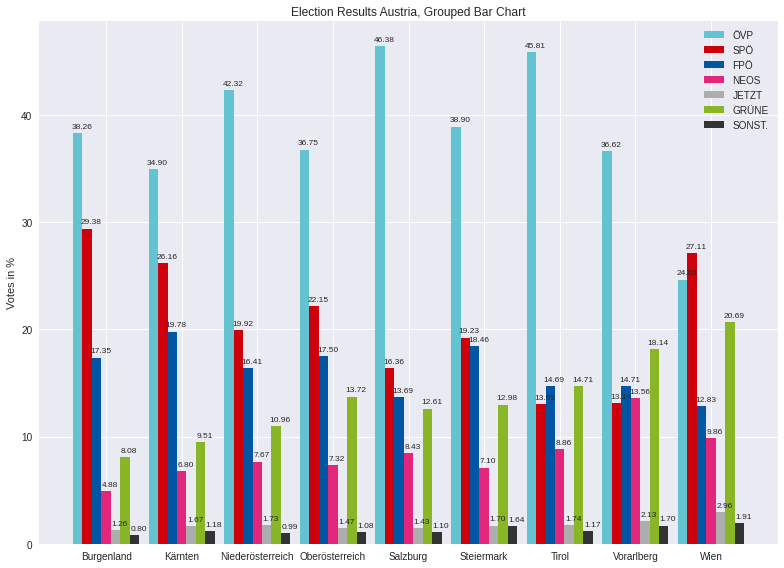

In [5]:
fig, ax = plt.subplots(figsize=(11,8)) # create subplot

bars = []
# create bars per party
for party in partys:
    bars.append(ax.bar(x_ticks + offset_party[party], 
        data[party], 
        width=bar_width, 
        label=party,
        color=colors_party[party]))

# set numbers for bars
for bar_party in bars:
    for bar in bar_party:
        height = bar.get_height()
        ax.annotate('{:4.2f}'.format(height), 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(4, 3),  # points offset
            textcoords="offset points",
            ha='center', 
            va='bottom',
            fontsize='small')

# set axis settings
ax.set_ylabel('Votes in %')
ax.set_title('Election Results Austria, Grouped Bar Chart')
ax.set_xticks(x_ticks + bar_width*3)
ax.set_xticklabels(state)

ax.legend() # add legend

plt.tight_layout() # select tight layout
plt.show()
fig.savefig('grouped_bar_chart.jpg')

In this grouped bar chart I grouped voting results of the partys by state so we can compare how different partys performed in each state. Because comparing only the bars is rather hard to see I annotated the result as a number to each bar.

# Parallel coordinates

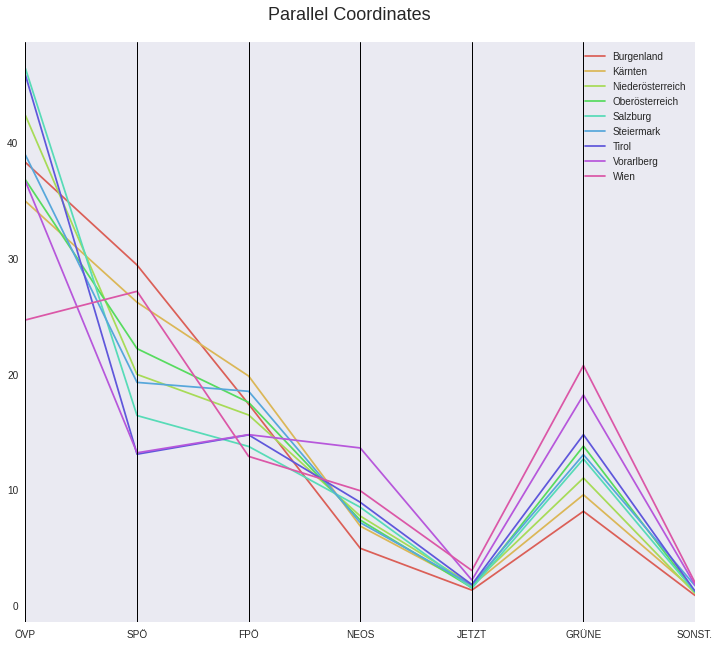

In [6]:
# create plot
fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)
parallel_coordinates(data, "Bundesland", color=sns.color_palette("hls", 9))
plt.show()
fig.savefig('parallel_coordinates_state.jpg')

This parallel coordinates plot has the partys as axes. So we can compare for each party how they performed for different states. We can also see which party performed better then others but its harder to see with numerous lines. For example its harder to see if FPÖ, SPÖ or GRÜNE are performing better.

In [7]:
# prepare data
data_party = data.T[1:]
data_party.columns = data.T[:1].values[0]
data_party.insert(0, 'Partei', data_party.index)
data_party.index = [i for i in range(0,7)]
data_party

,Partei,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien
0,ÖVP,38.26,34.9,42.32,36.75,46.38,38.9,45.81,36.62,24.63
1,SPÖ,29.38,26.16,19.92,22.15,16.36,19.23,13.02,13.14,27.11
2,FPÖ,17.35,19.78,16.41,17.5,13.69,18.46,14.69,14.71,12.83
3,NEOS,4.88,6.8,7.67,7.32,8.43,7.1,8.86,13.56,9.86
4,JETZT,1.26,1.67,1.73,1.47,1.43,1.7,1.74,2.13,2.96
5,GRÜNE,8.08,9.51,10.96,13.72,12.61,12.98,14.71,18.14,20.69
6,SONST.,0.8,1.18,0.99,1.08,1.1,1.64,1.17,1.7,1.91


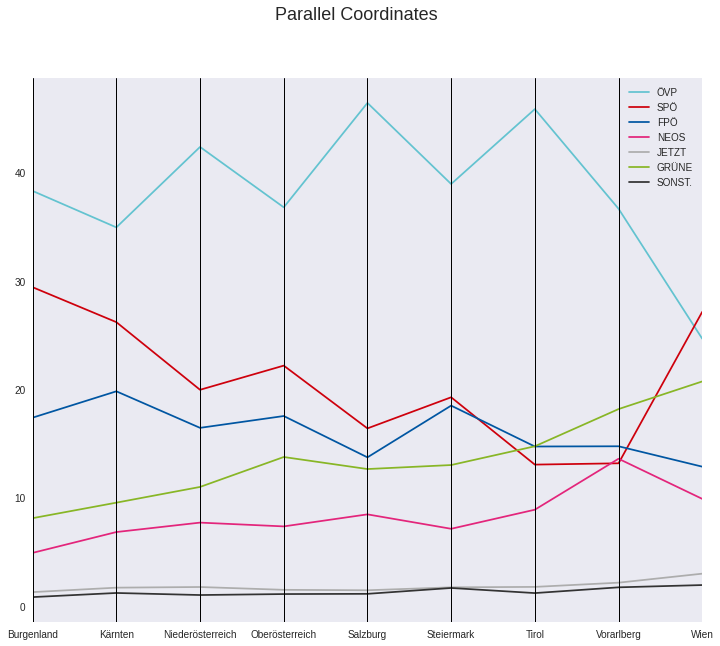

In [8]:
# create figure
fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
colors = ['#63C3D0', '#ce000c', '#0056A2', '#E3257B', '#ADADAD', '#88B626', '#333333']
parallel_coordinates(data_party, 'Partei', color=colors)
plt.show()
fig.savefig('parallel_coordinates_party.jpg')

For this plot the data was transformed to have the stats as axes to see more clearly the difference of the results per state. In this plot its more easy to see which party perfomrs best overall and also see per party the difference for different states.